In [1]:
import pandas as pd
from sklearn import linear_model, tree, neural_network, preprocessing
import numpy as np
import random
import os
import copy
import math
from matplotlib import pyplot as plt
from datetime import datetime
from itertools import combinations

#remove columns with a lot of missing values
com_data = pd.read_table('datasets/communities.data', header=None, delimiter=',')
column_names = pd.read_table('datasets/communities.names', header=None, delimiter=',')
c = column_names.to_numpy().flatten()
com_data.columns = c

cols = [126, 124, 123, 122, 121, 1, 2, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101]
print(len(cols))
com_data.drop(com_data.columns[cols], axis=1, inplace=True)
com_data.drop([130], inplace=True)

#transfrom categorical variable into numerical
ord_enc = preprocessing.OrdinalEncoder()
com_data[com_data.columns[1]] = ord_enc.fit_transform(com_data[[com_data.columns[1]]])
# print(com_data.columns[103])
i = list(com_data.columns)
i.insert(0, i.pop(i.index('racepctblack')))
i.insert(0, i.pop(i.index('medIncome')))
i.insert(0, i.pop(i.index('PctPopUnderPov')))
i.insert(0, i.pop(i.index('ViolentCrimesPerPop')))
com_data = com_data[i]
com_data.to_csv('com_processed_data.csv')
npdata = com_data.to_numpy()


24


In [2]:
#define the test indices and define the test data. This data remains untouched
random.seed(50)
test_indices = np.unique(np.array([random.randint(0,npdata.shape[0]-1) for k in range(0,math.ceil(0.2*npdata.shape[0]))]))
# print(test_indices)
test_data = npdata[test_indices, :]
test_X = test_data[:,1:]
real_mpg = test_data[:, 0]

#set up iteration variables and parameters
mu = 0
# displacement = 1st column, hp = 2nd column, weight = 3rd column, acceleration = 4th column
features = [[0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]] 
input_variances = np.arange(0,0.25,0.01)
iterations = 100


#set up arrays for the results of the models
results = np.zeros([iterations, test_X.shape[0]])
output_variances = np.zeros(input_variances.size)
plot_matrix = np.zeros([len(features), input_variances.size])

for j in range(0, len(features)):
    k = 0
    for sig in input_variances:
        rng = np.random.default_rng(12345)
        for i in range(0, iterations):
            data = copy.deepcopy(npdata)
            training_data = np.delete(data, test_indices, axis=0)
            rows = training_data.shape[0]
            noise_indices = rng.choice(rows-1, math.ceil(0.1*rows), replace=False)
            for el in features[j]:
                noises = rng.normal(mu, sig, noise_indices.shape)
                training_data[noise_indices, el] += noises
            training_X = training_data[:, 1:]
            training_y = training_data[:, 0]
            ######################################################### LINEAR REGRESSION
            # clf = linear_model.LinearRegression()
            ######################################################### DECISION TREE
            # clf = tree.DecisionTreeRegressor(random_state=42)
            ######################################################### NEURAL NET
            clf = neural_network.MLPRegressor(random_state=42, max_iter=200)
            #########################################################
            clf = clf.fit(training_X, training_y)
            prediction_mpg = clf.predict(test_X)
            results[i] = prediction_mpg
        variances = np.array([np.var(results[:, k]) for k in range(0, results.shape[1])])
        mean_output_variance = np.mean(variances)
        print(mean_output_variance)
        output_variances[k] = mean_output_variance
        plot_matrix[j] = output_variances
        k += 1
# print(output_variances)
print("done")

3.448765499004497e-33
0.003946820880503859
0.003774173998413708
0.003191643254171897
0.005552405865416354
0.007705698335299345
0.009512216767408875
0.010423511714084961
0.010934739623538844
0.008878933871099778
0.009654284474979345
0.010792055159790159
0.009438683180892134
0.01050690691365532
0.009572373029161935
0.007899557659117134
0.007732076017587471
0.008161550024433724
0.0088364522251074
0.007795074366919591
0.00688416807724981
0.007403881623398677
0.009052899822701313
0.007243132054735038
0.007281112216303447
3.448765499004497e-33
0.004845418782826273
0.004452133856982433
0.004779639539294507
0.003260236965152158
0.0029548597301052716
0.0029679526319253725
0.0048196914577679556
0.002822235171031396
0.0032668883016238252
0.0046128044141789904
0.0032138923335876474
0.005370849993788123
0.00721770474681338
0.004802173484244057
0.005291265399615923
0.0060034320182877875
0.006787385749685153
0.006761312985236075
0.008633328602252107
0.007639241115080397
0.008147544430602413
0.0085329

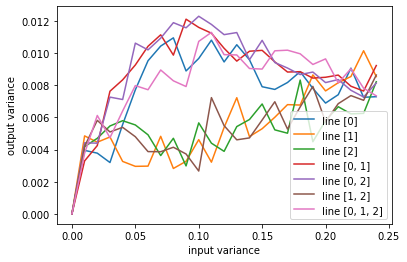

In [3]:
now = datetime.now()
timestamp = datetime.timestamp(now)
#Plot the outcomes
t=0
for arr in plot_matrix:
    plt.plot(input_variances, arr, label="line " + str(features[t]))
    t+=1
plt.xlabel('input variance')
plt.ylabel('output variance')
plt.legend()
plt.savefig('community dec tree experiment'+ str(timestamp) + '.png')
plt.show()
